In [1]:
import numpy as np
from matplotlib import pylab as plt

### Game of life
---

$$
T_c = \tau_0 + \tau_c L_c
$$

где $\tau_0$ - время инициализации сообщения
$\tau_c$ - время передачи сообщения единичной длины
$L_c$ - длина сообщения
$T_c$ - время передачи сообщения длины $L_c$

$$
T_a = \tau_a L_a
$$
где $\tau_a$ - время выполнения одной арифметической операции
$L_a$ - общее количество арифметических операций в алгоритме

Обозначим $\tau = \frac{\tau_c}{\tau_a}$, $L = \frac{L_c}{L_a}$.

Ускореине:
$$
\begin{equation}
  \begin{aligned}
    S &= S(p) = \frac{T(1)}{T(p)} = \frac{T_a}{\frac{T_a}{p} + \frac{T_c}{p}} \\
      &= \frac{pT_a}{T_a + T_c} = \frac{p}{1 + \frac{T_c}{T_a}} = \frac{p}{1 + \frac{\tau_c L_c}{\tau_a L_a}} \\
      &= \frac{p}{1 + \tau L}
  \end{aligned}
\end{equation}
$$

Эта модель подходит, так как все обмены синхронны. У всех процессов вычисления сбалансированы практически полностью.

Пусть $n$ - размерность сетки игры. То есть поле имеет размер $n \times n$

Тогда за одну итерацию:
$$
L_a = n^2 / p, L_c = 4p \left(\frac{n}{\sqrt{p}} + 1\right), L = L_c / L_a = \frac{4p^2}{n^2}\left(\frac{n}{\sqrt{p}} + 1\right)
$$

А ускорение:
$$
S = \frac{p}{1 + \frac{4\tau p^2}{n^2}\left(1 + \frac{n}{\sqrt{p}}\right)}
$$

In [2]:
p = np.array([1, 4, 8, 16, 32])

In [23]:
T1_1 = 84.575925
Tp_1 = np.array([84.575925, 21.872338, 11.777515, 6.456451, 3.373908])
S_1 = T1_1 / Tp_1

T1_2 = 758.981477
Tp_2 = np.array([758.981477, 195.084047, 105.104517, 55.171384, 31.087809])
S_2 = T1_2 / Tp_2

tau = 100

n_1 = 360
L_c = 4 * p * (n_1 / p ** 0.5 + 1)
L_a = (n_1 ** 2 * 8 * 100) / p
L = L_c / L_a
S_th_1 = p / (1 + tau * L)

n_2 = 1080
L_c = 4 * p * (n_2 / p ** 0.5 + 1)
L_a = (n_2 ** 2 * 8 * 100) / p
L = L_c / L_a
S_th_2 = p / (1 + tau * L)

print(L_c)
print(L_a)
print(L)
print(S_th)

[ 4324.          8656.         12250.8051789  17344.
 24565.61035781]
[9.3312e+08 2.3328e+08 1.1664e+08 5.8320e+07 2.9160e+07]
[4.63391632e-06 3.71056241e-05 1.05030909e-04 2.97393690e-04
 8.42442056e-04]
[ 0.99860919  3.95580245  7.75438842 14.68056185 25.49056672]


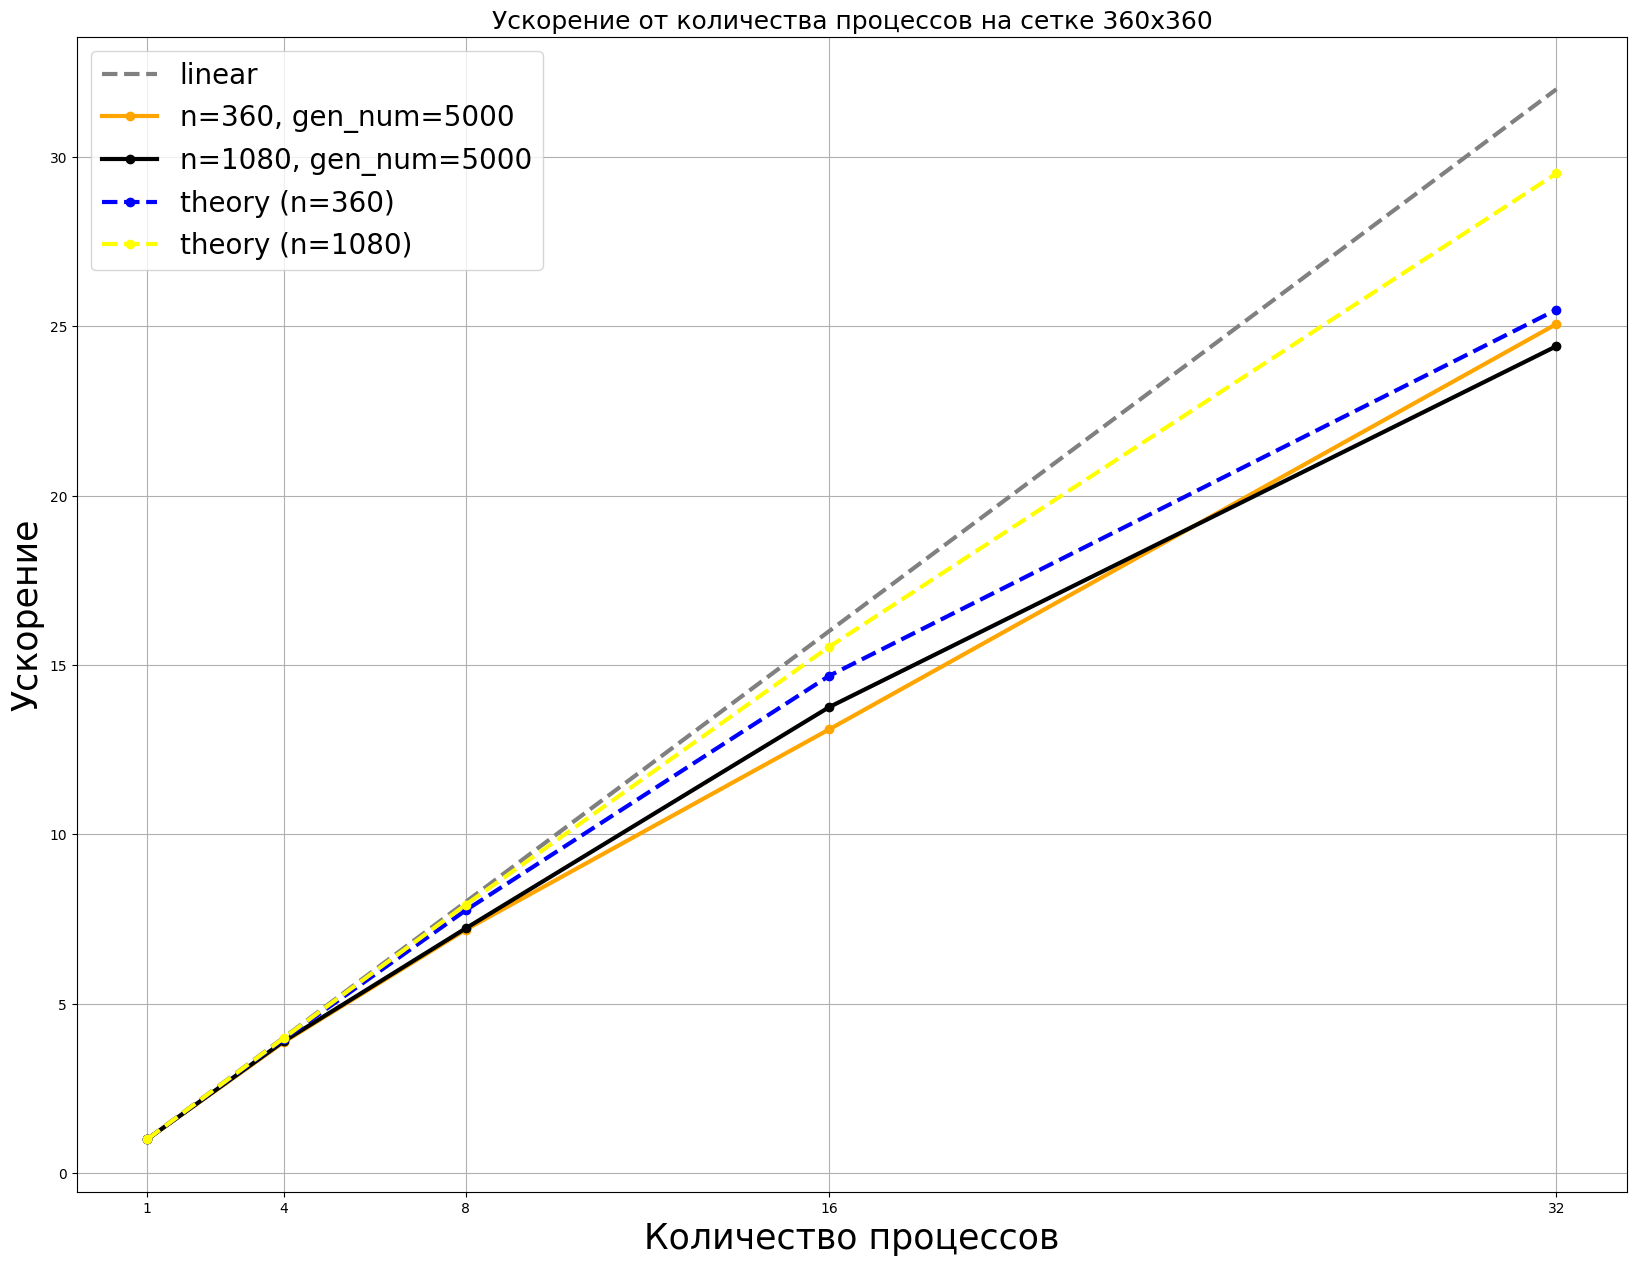

In [24]:
plt.figure(figsize = (20, 15))
lw = 3
plt.plot(p, p, linestyle='--', color='gray', linewidth=lw, label='linear')
plt.plot(p, S_1, marker='o', linestyle ='-', color ='orange', linewidth=lw, label ='n=360, gen_num=5000')
plt.plot(p, S_2, marker='o', linestyle ='-', color ='black', linewidth=lw, label ='n=1080, gen_num=5000')
plt.plot(p, S_th_1, marker='o', linestyle ='--', color ='blue', linewidth=lw, label ='theory (n=360)')
plt.plot(p, S_th_2, marker='o', linestyle ='--', color ='yellow', linewidth=lw, label ='theory (n=1080)')

plt.title("Ускорение от количества процессов на сетке 360x360", fontsize = 18)
plt.xlabel("Количество процессов", fontsize = 25)
plt.ylabel("Ускорение", fontsize = 25)
plt.grid(True)
plt.xticks(p)

plt.legend(fontsize = 20)
plt.show()